## <center>Challenges in Machine Learning</center>

In [2]:

from IPython.display import HTML

HTML('<iframe src="https://player.vimeo.com/video/280701877" width="800" height="600" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>'
)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.datasets import fetch_datasets
import warnings
warnings.filterwarnings("ignore")

In [59]:
#Loading the wine quality data for mini-challenge and splitting it into train & test.
df =  pd.read_csv("../data/Wine_quality.csv")
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        0  
1      9.5        0  
2     10.1        0  
3      9.9        0  
4      9.9        0

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
### Print out the distribution percentage of the classes.

In [60]:
# The classes are heavily skewed we need to solve this issue later.
print('Bad Quality Wine', round(df['quality'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Good Quality Wine', round(df['quality'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Bad Quality Wine 96.26 % of the dataset
Good Quality Wine 3.74 % of the dataset


**Note: Notice how imbalanced is our original dataset! Most of the wines sample are Bad Quality. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most of the wines are Bad Quality. But we don't want our model to assume, we want our model to detect patterns that give signs of Good Quality Wine(In other words we need to make sure that bad wines should not be predicted as good ones.)!**

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
### Check for class imbalance using a count plot.

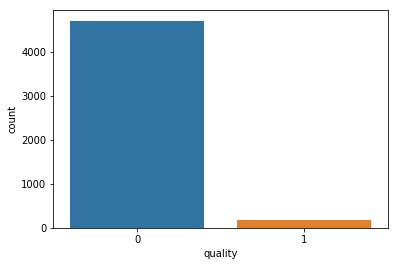

In [61]:
sns.countplot('quality', data=df)

**Distributions: By seeing the distributions we can have an idea how skewed are these features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook.**

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
* Store the independent attributes in the X variable and dependent variable(`quality`) in y and split X and y into X_train,X_test,y_train,y_test with `random_state=2`
* Fit a Random forest classifier model with random_state=42 on the imbalanced data. Find out the f1-score, precision score, recall score, roc-auc score, confusion matrix and accuracy score.

In [62]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)
rf_classifier_bal = RandomForestClassifier(random_state=42)
rf_classifier_bal.fit(X_train,y_train)
y_pred = rf_classifier_bal.predict(X_test)

accuracy = rf_classifier_bal.score(X_test,y_test)
print("Accuracy Score:  ",accuracy)

recall = recall_score(y_test,y_pred)
print("Recall:          ",recall)

precision = precision_score(y_test,y_pred)
print('Precision Score: ',precision)

f1 = f1_score(y_test,y_pred)
print("F1 Score:        ",f1)

confusion_mat =confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_mat)

Accuracy Score:   0.9640816326530612
Recall:           0.13953488372093023
Precision Score:  0.46153846153846156
F1 Score:         0.21428571428571427
Confusion Matrix: 
 [[1175    7]
 [  37    6]]


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
###  In above challenge we got an accuracy of 0.96 but we can see our recall is 0.13 which is very less. Lets try to improve the recall/F1 score. 
**Let's now try to see if random undersampling will improve the performance of our ML model**
* Implement undersampling using random_under_sampler of imblearn with random_state =42.
* And then, Fit a random forest classifier model with random_state=42 on the balanced data. Find out the f1-score, precision score, recall score, roc-auc score, confusion matrix and accuracy score.

In [63]:
from imblearn.under_sampling import RandomUnderSampler
# Code starts here
rus = RandomUnderSampler(random_state =42)
X_sample2 ,y_sample2= rus.fit_sample(X_train,y_train)

# implement logistic regression
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_sample2,y_sample2)
y_pred = model_rus.predict(X_test)

accuracy_rus = model_rus.score(X_test,y_test)
print("Accuracy Score:  ",accuracy_rus)

recall_rus = recall_score(y_test,y_pred)
print("Recall:          ",recall_rus)

precision_rus = precision_score(y_test,y_pred)
print('Precision Score: ',precision_rus)

f1_rus = f1_score(y_test,y_pred)
print("F1 Score:        ",f1_rus)

confusion_mat_rus =confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_mat_rus)




Accuracy Score:   0.7828571428571428
Recall:           0.7441860465116279
Precision Score:  0.11149825783972125
F1 Score:         0.19393939393939394
Confusion Matrix: 
 [[927 255]
 [ 11  32]]


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
### Oversampling has an advantage over undersampling in the form of no information loss. Let's see if our Random Forest Classifier model works better after random oversampling
* Implement oversampling using RandomOverSampler of imblearn with random_state=4
* And then, Fit a Random forest classifier model with random_state=42 on the balanced data. Find out the f1-score, precision score, recall score, roc-auc score, confusion matrix and accuracy score.

In [64]:
from imblearn.over_sampling import RandomOverSampler

# Code starts here
ros = RandomOverSampler(random_state = 4)

X_sample5 , y_sample5 = ros.fit_sample(X_train,y_train)

model_ros = RandomForestClassifier(random_state = 42)
model_ros.fit(X_sample5,y_sample5)
y_pred = model_ros.predict(X_test)

accuracy_ros = model_ros.score(X_test,y_test)
print("Accuracy Score:  ",accuracy_ros)

recall_ros = recall_score(y_test,y_pred)
print("Recall:          ",recall_ros)

precision_ros = precision_score(y_test,y_pred)
print('Precision Score: ',precision_ros)

f1_ros = f1_score(y_test,y_pred)
print("F1 Score:        ",f1_ros)

confusion_mat_ros =confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",confusion_mat_ros)

Accuracy Score:   0.9657142857142857
Recall:           0.13953488372093023
Precision Score:  0.5454545454545454
F1 Score:         0.22222222222222218
Confusion Matrix: 
 [[1177    5]
 [  37    6]]


<img src="../images/icon/quiz.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

### Challenges in Machine Learning
***
Q1. Cluster sampling, stratified sampling and systematic sampling are types of
```python
A. direct sampling
B. indirect sampling
C. random sampling
D. non random sampling
Ans:- C
```
Q2. On skewed datasets (e.g., when there are more positive examples than negative examples), accuracy is not a good measure of performance and you should instead use F1 score based on the precision and recall.

Is the above statement True or False ?
```python
A. True
B. False

Ans : A.
```
    
Q.3). 